In [2]:
import numpy as np
import pandas as pd
import warnings
import riskfolio as rp
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [3]:
acwi_tbsc = pd.read_excel('./acwi_tbsc.xlsx', sheet_name='2011-2021')
acwi_tbsc

,ACWI,TBSC
0,0.2500%,1.2600%
1,-5.5900%,0.4900%
2,3.7000%,1.1300%
3,5.6800%,-0.3800%
4,4.3100%,1.1000%
...,...,...
115,2.5000%,0.2600%
116,8.8200%,-1.1800%
117,-0.2800%,-0.0200%
118,-1.1400%,-0.2300%


In [4]:
port = rp.Portfolio(returns=acwi_tbsc)

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

points = 10 # Number of points of the frontier
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MDD' #'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.07 # Risk free rate

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head(20))

,ACWI,TBSC
0,15.3374%,84.6626%
1,32.8131%,67.1869%
2,41.2114%,58.7886%
3,49.6098%,50.3902%
4,58.0082%,41.9918%
5,66.4065%,33.5935%
6,74.8049%,25.1951%
7,83.2033%,16.7967%
8,91.6016%,8.3984%
9,100.0000%,0.0000%


In [5]:
obj = 'Sharpe'
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, hist=hist)

display(w)

The problem doesn't have a solution with actual input parameters


None

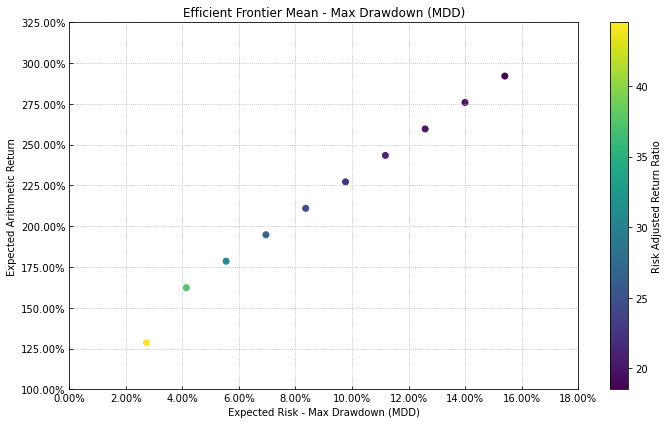

In [6]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets



ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

fig = ax.get_figure()




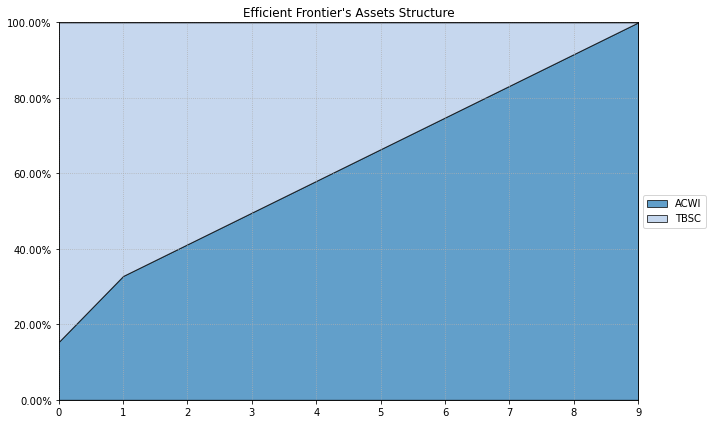

In [7]:

# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)



In [8]:
means = pd.read_excel('mean_variance.xlsx')
cov_table = pd.read_excel('mean_variance.xlsx', sheet_name='cov_matrix')
cov_table = cov_table.set_index('Unnamed: 0')
portfolios = pd.read_excel('mean_variance.xlsx', sheet_name='weights')
portfolios.values

array([[ 0.9098,  0.0225,  0.0677],
       [ 0.85  ,  0.0033,  0.1467],
       [ 0.7903, -0.016 ,  0.2257],
       [ 0.7305, -0.0352,  0.3047],
       [ 0.6707, -0.0545,  0.3837],
       [ 0.611 , -0.0737,  0.4628],
       [ 0.5512, -0.093 ,  0.5418],
       [ 0.4915, -0.1122,  0.6208],
       [ 0.4317, -0.1315,  0.6998],
       [ 0.3719, -0.1507,  0.7788],
       [ 0.3122, -0.17  ,  0.8578],
       [ 0.2524, -0.1892,  0.9368],
       [ 0.1927, -0.2085,  1.0158],
       [ 0.1329, -0.2277,  1.0948],
       [ 0.0731, -0.247 ,  1.1738]])

In [9]:
def pstd(weights, cov_matrix):
    #variance = np.transpose(weights)@cov_matrix@weights
    variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return np.sqrt(variance)

def pmean(weightsDf, means):  
    weights = weightsDf
    return np.sum(weights * means)

def portfolioMeasures(weights,means,cov_table):
    mu = np.apply_along_axis(pmean,1,weights, means=means)
    std = np.apply_along_axis(pstd,1,weights, cov_matrix=cov_table) 
    return np.array([mu,std]).T


In [12]:


porfolioMeasure = portfolioMeasures(portfolios.values, means.values.T[1], cov_table)


porfolioMeasure

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [11]:
means = acwi_tbsc.mean()
means.values
cov = acwi_tbsc.cov()
cov = cov.to_numpy()

measures = portfolioMeasures(frontier.values.T,means,cov)
#std = np.apply_along_axis(pstd,1,(frontier.values.T, cov)
measures
print(frontier)

            0        1        2        3        4        5        6        7  \
ACWI 15.3374% 32.8131% 41.2114% 49.6098% 58.0082% 66.4065% 74.8049% 83.2033%   
TBSC 84.6626% 67.1869% 58.7886% 50.3902% 41.9918% 33.5935% 25.1951% 16.7967%   

            8         9  
ACWI 91.6016% 100.0000%  
TBSC  8.3984%   0.0000%  
